In [ ]:
from google.colab import drive
drive.mount('drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at drive/


In [ ]:
import os
os.chdir('drive/My Drive/Data Science/Regression')

In [ ]:
# 
import numpy as np # numerical python
import pandas as pd # pannel datasets
import matplotlib.pyplot as plt # visualization
import seaborn as sns # visualization

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# loading the data
df = pd.read_excel('data/big_mac.xlsx')

In [ ]:
df.head()

,big_mac_price,hourly_wages_usd
0,1.42,1.70
1,1.86,7.80
2,1.48,2.05
3,3.14,12.30
4,2.21,9.35


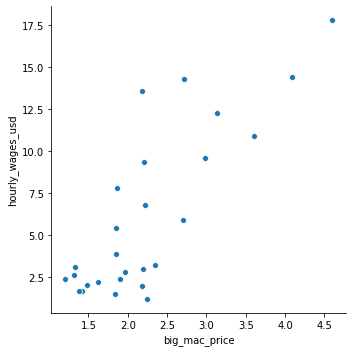

In [ ]:
# scatter
sns.relplot(x='big_mac_price',y='hourly_wages_usd',data=df)
plt.show()

# Linear Regression

In [ ]:
import statsmodels.api as sm

In [ ]:
# OLS
model = sm.OLS.from_formula('hourly_wages_usd ~ big_mac_price',data=df).fit()

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       hourly_wages_usd   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     48.88
Date:                Mon, 13 Jul 2020   Prob (F-statistic):           2.50e-07
Time:                        08:18:44   Log-Likelihood:                -66.251
No. Observations:                  27   AIC:                             136.5
Df Residuals:                      25   BIC:                             139.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -4.5397      1.619     -2.805

In [ ]:
# fitted values
net_hourly_wages_pred = -4.5397 + 4.7435 * df['big_mac_price']

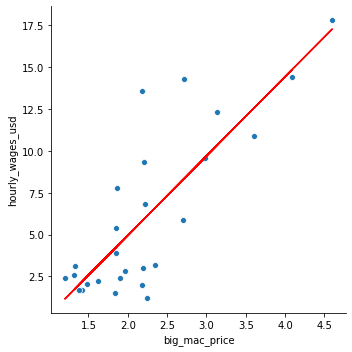

In [ ]:
# scatter
sns.relplot(x='big_mac_price',y='hourly_wages_usd',data=df)
plt.plot(df['big_mac_price'],net_hourly_wages_pred,'r-')
plt.show()

### ANOVA 
- F - statistics = $ \frac{(ssr / df_ssr)}{ (sse / df_sse)} $


In [ ]:
ssr = np.sum(np.square(net_hourly_wages_pred - net_hourly_wages_pred.mean()))
sse = np.sum(np.square(net_hourly_wages_pred - df['hourly_wages_usd'].values))

In [ ]:
ssr, sse

(418.1817241247, 213.88429646337502)

In [ ]:
df_ssr = 1 # k (no. of independent features)
df_sse = 27 - 1 - df_ssr

In [ ]:
F_stats = (ssr/df_ssr)/(sse/df_sse)
F_stats

48.879432833479235

### R _ Square  = $ 1 - \frac{sse}{ sst} $

In [ ]:
sst = sse+ ssr 

r_square = 1 - (sse/sst)
print('R Square Value =',r_square)

R Square Value = 0.6616108294124452


![image](https://i.postimg.cc/zGyPG5HG/questions.png)

In [ ]:
# correlation (r)
df.corr()

,big_mac_price,hourly_wages_usd
big_mac_price,1.000000,0.813396
hourly_wages_usd,0.813396,1.000000


answer: yes, there is realtionship, 0.8133 is the correlation values

answer-2: yes, you can develop the model since F-stats value is significant. and the model is 66.16 strenght of the model

In [ ]:
np.square(0.813396) # method-2

0.661613052816

In [ ]:
# answer -3
net_hourly_wages_pred = -4.5397 + 4.7435 * 3

In [ ]:
net_hourly_wages_pred

9.6908